# Name: Jagadish Reddy

#  Workshop - 1: Clustring using Unsupervised ML by KMeans Algorithm.

# 

# Importing of libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing of data
df=pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#getting the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
#checking the columns from data
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [22]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
corr= df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

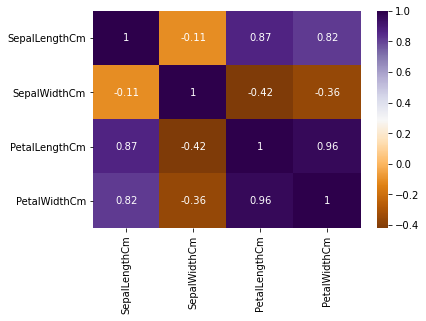

In [27]:
sns.heatmap(corr,annot=True,cmap="PuOr")

In [6]:
#store the x values
df=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

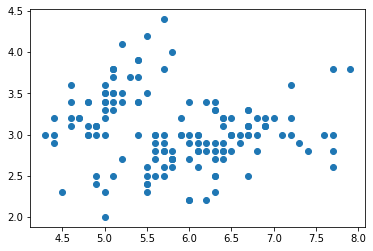

In [7]:
#ploting of graph
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])

In [8]:
#importing minmaxscaler
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()

In [10]:
scaled_data=scaler.fit_transform(df)

In [11]:
scaled_data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [12]:
#importing KMeans
from sklearn.cluster import KMeans

In [13]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(scaled_data)
    sse.append(km.inertia_)

In [14]:
sse

[41.13817202297779,
 12.143688281579719,
 6.9981140048267605,
 5.5328310030819,
 4.571180508755746,
 3.915800611971109,
 3.461676882996156,
 3.1225939259463185,
 2.812894018992137]

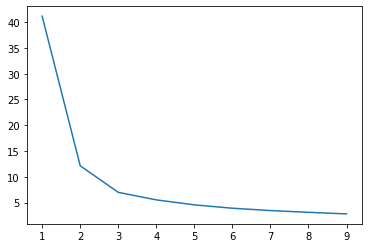

In [15]:
#ploting the graph
plt.plot(k_rng,sse)

In [16]:
km=KMeans(n_clusters=3)

In [17]:
y_pred=km.fit_predict(scaled_data)

In [18]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [19]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_pred=km.fit_predict(scaled_data)

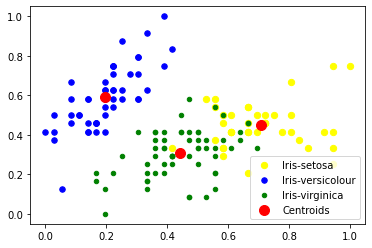

In [20]:
# Visualising the clusters - On the first two columns
plt.scatter(scaled_data[y_pred == 0, 0], scaled_data[y_pred == 0, 1], s = 40, c = 'yellow', label = 'Iris-setosa')
plt.scatter(scaled_data[y_pred == 1, 0], scaled_data[y_pred == 1, 1], s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_data[y_pred == 2, 0], scaled_data[y_pred == 2, 1],s = 20, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()